In [6]:
import pandas as pd
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def parse_logs_to_df(filename="logs.txt"):
    records = []
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            try:
                timestamp_str = line[:19]
                timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S")
                if "INFO" in line:
                    status = "INFO"
                    match = re.search(r"processed in ([\d\.]+)s", line)
                    time_taken = float(match.group(1)) if match else None
                elif "ERROR" in line:
                    status = "ERROR"
                    time_taken = None
                elif "WARNING" in line:
                    status = "WARNING"
                    match = re.search(r"slow response ([\d\.]+)s", line)
                    time_taken = float(match.group(1)) if match else None
                else:
                    continue

                records.append({
                    "timestamp": timestamp,
                    "hour": timestamp.hour,
                    "status": status,
                    "time_taken": time_taken
                })

            except Exception as e:
                print("Error parsing line:", line)
                continue

    return pd.DataFrame(records)

In [4]:
def visualize_logs(df):
    sns.set(style="darkgrid")

    # 1. Errors per Hour
    error_counts = df[df["status"] == "ERROR"].groupby("hour").size().reset_index(name="error_count")
    plt.figure(figsize=(8, 4))
    sns.barplot(data=error_counts, x="hour", y="error_count", palette="Reds")
    plt.title("Error Count per Hour")
    plt.savefig("errors_per_hour.png")
    plt.show()

    # 2. INFO: Processing Time Over Time
    info_df = df[df["status"] == "INFO"]
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=info_df, x="timestamp", y="time_taken", marker='o')
    plt.title("Processing Time (INFO Logs)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("processing_time_trend.png")
    plt.show()

    # 3. Warning Summary
    total_warnings = df[df["status"] == "WARNING"].shape[0]
    print(f"\nTotal Warnings: {total_warnings}")


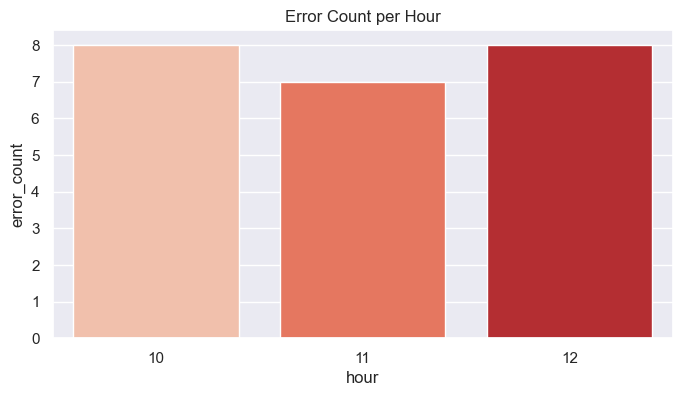

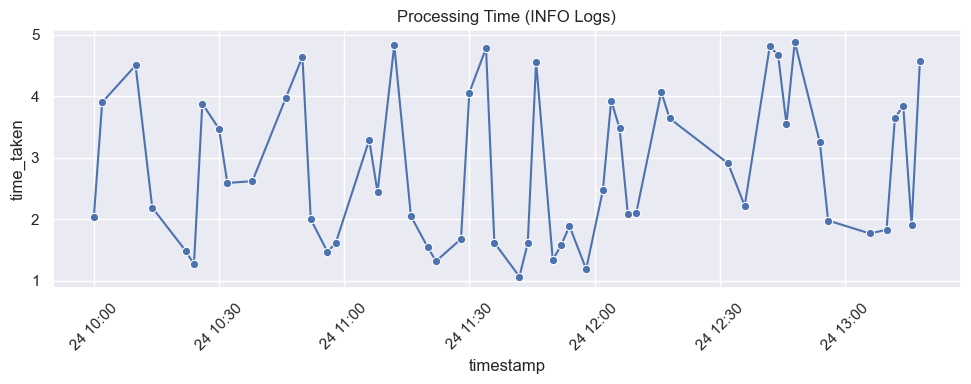


Total Warnings: 24


In [7]:
if __name__ == "__main__":
    df = parse_logs_to_df()
    visualize_logs(df)